In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report

In [139]:
#creating a dataset corresponding to the function y = x1 + x2
y = [3]    
s = 3
d = 4
for i in range (1,500):
    s+=d
    y.append(s)
y += np.random.rand(len(y))    #adding random noise
X = []    #the input matrix
for i in range(1,1001):
    X.append(i)
X = np.array(X)
X_min = X.min()
X_max = X.max()
X = (X - X_min) / (X_max - X_min)
y = np.array(y)
X = np.array(X).reshape(y.size,2)
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)
X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.25, shuffle=True)
X = np.hstack( ((np.ones((X.shape[0],1))),X) )
w = np.zeros((X.shape[1]))
epochs = 500
alpha = 0.1
features = X.shape[1]
samples = X.shape[0]
print(X.shape)
# print(X[0])

(500, 3)


In [107]:
# for epoch_counter in range (0,epochs):
#     for sample_counter in range(0,samples):
#         output = np.dot(X[sample_counter],w)-y[sample_counter]
#         for feature_counter in range(0,features):
#             derivative = output*X[sample_counter][feature_counter]
#             w[feature_counter]-=derivative*alpha
#         print(w)

In [100]:
# df = pd.read_csv('synthetic_dataset.csv')
# df = df.set_index('Unnamed: 0')
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df[df.drop(['Outcome'],axis=1).columns] = scaler.fit_transform(df[df.drop(['Outcome'],axis=1).columns])
# X = df.drop(['Outcome'],axis = 1)
# y = df['Outcome']
# X_train, X_test,y_train, y_test = train_test_split(X, y ,random_state=101, test_size=0.3, shuffle=True)
# sns.pairplot(df)

In [140]:
class Model:
    y = []
    X = []
    w = []
    epochs = 0
    alpha = 0.1
    features = 0
    samples = 0
    def __init__(self,X,y,epochs = 500):
        self.X = np.hstack((np.ones((X.shape[0],1)),X))
        self.y = np.array(y)
        self.w = np.zeros(self.X.shape[1])
        self.samples = X.shape[0]
        self.epochs = epochs
        self.features = X.shape[1]+1
    
    def fit(self):
        for epoch_counter in range (0,self.epochs):
            for sample_counter in range(0,self.samples):
                output = np.dot(self.X[sample_counter],self.w)-self.y[sample_counter]
                for feature_counter in range(0,self.features):
                    derivative = output*self.X[sample_counter][feature_counter]
                    self.w[feature_counter]-=derivative*self.alpha
            
    def predict(self,X_test):
        X_test1 = np.hstack((np.ones((X_test.shape[0],1)),X_test))
        predictions = []
        for x in X_test1:
            predictions.append(np.dot(x,self.w))
        return np.array(predictions)

In [141]:
myModel = Model(X_train,y_train,500)
model = LinearRegression()
myModel.fit()
model.fit(X_train,y_train)

LinearRegression()

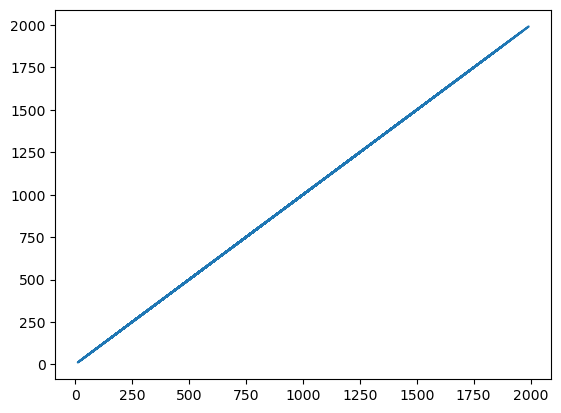

In [142]:
myPredictions = myModel.predict(X_test)
predictions = model.predict(X_test)
plt.plot(predictions,myPredictions)

In [143]:
print(f"sklearn: {np.sqrt(mean_squared_error(y_test, predictions))} myModel: {np.sqrt(mean_squared_error(y_test, myPredictions))}")

sklearn: 0.3042444475822505 myModel: 0.3211596242065531


In [104]:
# def sigmoid(x):
#     return round(1/(1 + np.exp(-x)))

In [103]:
# vectorized_sigmoid = np.vectorize(sigmoid)

In [102]:
# predictions = vectorized_sigmoid(predictions)
# myPredictions = vectorized_sigmoid(myPredictions)
# pre = vectorized_sigmoid(y_test)
# print(classification_report(pre, predictions, target_names=["class 0","class 1"]))
# print(classification_report(pre, myPredictions, target_names=["class 0","class 1"]))

In [101]:
# df.head()

In [145]:
# myModel.predict(np.array([[(100-X_min)/(X_max-X_min),(50-X_min)/(X_max-X_min)]]))

array([150.51787024])

In [117]:
type(X_test)

numpy.ndarray